In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import json
import gzip

In [2]:
def parse(path):
    g=gzip.open(path,'rb')
    for l in g:
        yield eval(l)
def getDF(path):
    i=0
    df={}
    for d in parse(path):
        df[i]=d
        i+=1
    return pd.DataFrame.from_dict(df,orient='index')
df=getDF("reviews_Musical_Instruments_5 (1).json.gz")

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


#### hear sentiment is rating of 5,4 are positive.3 is neutral and 3,2 are negative.

In [4]:
df=df.drop(["reviewerName"],axis=1)
df=df.rename(columns={"asin":"productID","overall":"rating","unixReviewTime":"unixTime"})
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,unixTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


#### There is no null values present in the dataset

In [5]:
df["reviewTime"]=pd.to_datetime(df["reviewTime"])


In [6]:
df=df.drop(["unixTime"],axis=1)
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,2014-02-28
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,2013-03-16
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,2013-08-28
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,2014-02-14
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,2014-02-21


In [7]:
df["sentiment"]=df['rating']
df["sentiment"]=df["sentiment"].replace({1:"extreme_negative",2:"negative",3:"neutral",4:"positive",5:"extreme_positive"})
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,sentiment
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,2014-02-28,extreme_positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,2013-03-16,extreme_positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,2013-08-28,extreme_positive
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,2014-02-14,extreme_positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,2014-02-21,extreme_positive


In [8]:
df.size

82088

In [9]:
df.shape

(10261, 8)

In [10]:
df.columns

Index(['reviewerID', 'productID', 'helpful', 'reviewText', 'rating', 'summary',
       'reviewTime', 'sentiment'],
      dtype='object')

In [11]:
df.dtypes

reviewerID            object
productID             object
helpful               object
reviewText            object
rating               float64
summary               object
reviewTime    datetime64[ns]
sentiment             object
dtype: object

In [12]:
df.isnull().sum()

reviewerID    0
productID     0
helpful       0
reviewText    0
rating        0
summary       0
reviewTime    0
sentiment     0
dtype: int64

In [13]:
df.describe()

,rating
count,10261.000000
mean,4.488744
std,0.894642
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Data visualization

In [14]:
import warnings
warnings.filterwarnings('ignore')

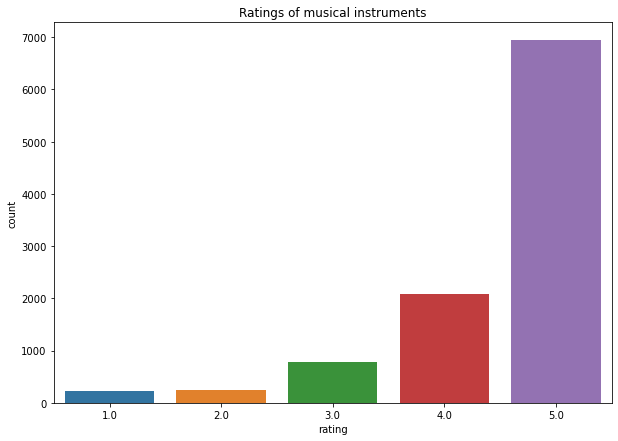

In [15]:
plt.figure(figsize=(10,7))
sb.countplot(df['rating'])
plt.title('Ratings of musical instruments')
plt.xlabel('rating')
plt.show()

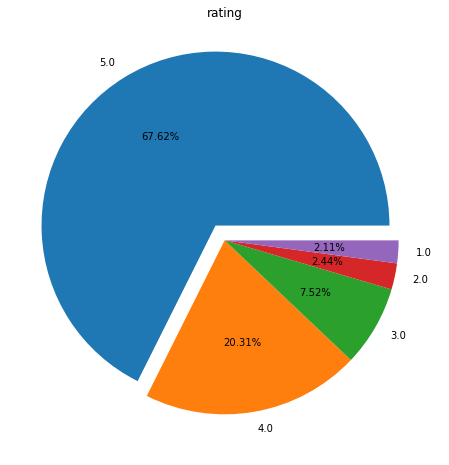

In [16]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title("rating")
percentage = df['rating'].value_counts()
labels = list(df['rating'].value_counts().index)
plt.pie(percentage, labels = labels, autopct = '%0.2f%%', explode = (0.1,0,0,0,0))
plt.show()

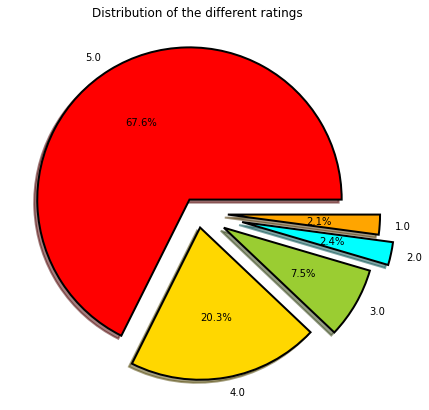

In [17]:
fig = plt.figure(figsize=(7,7))
colors = ("red","gold","yellowgreen","cyan","orange")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f%%',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings')
plt.show()

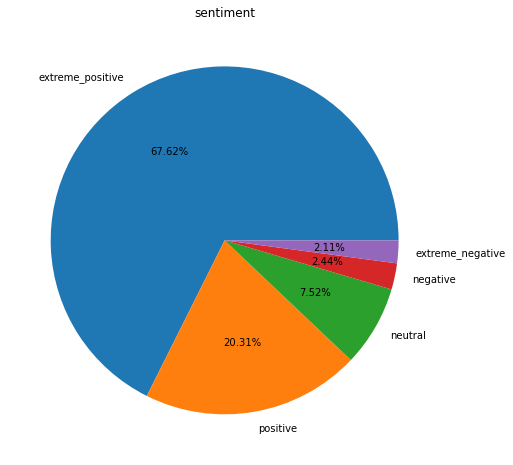

In [18]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title("sentiment")
percentage = df['sentiment'].value_counts()
labels = list(df['sentiment'].value_counts().index)
plt.pie(percentage, labels = labels, autopct = '%0.2f%%')
plt.show()

In [19]:
df["reviewyear"]=df['reviewTime'].dt.year
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,sentiment,reviewyear
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,2014-02-28,extreme_positive,2014
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,2013-03-16,extreme_positive,2013
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,2013-08-28,extreme_positive,2013
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,2014-02-14,extreme_positive,2014
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,2014-02-21,extreme_positive,2014


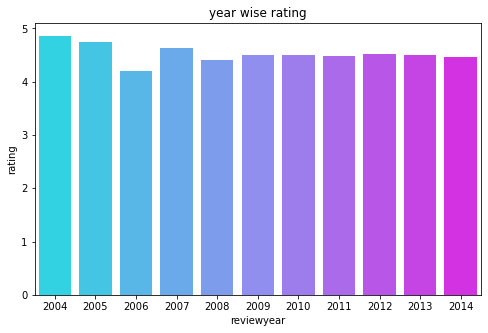

In [20]:
plt.figure(figsize = (8,5))
sb.barplot(data = df, x = 'reviewyear', y = 'rating', palette = 'cool', ci = False)
plt.title("year wise rating")
plt.show()

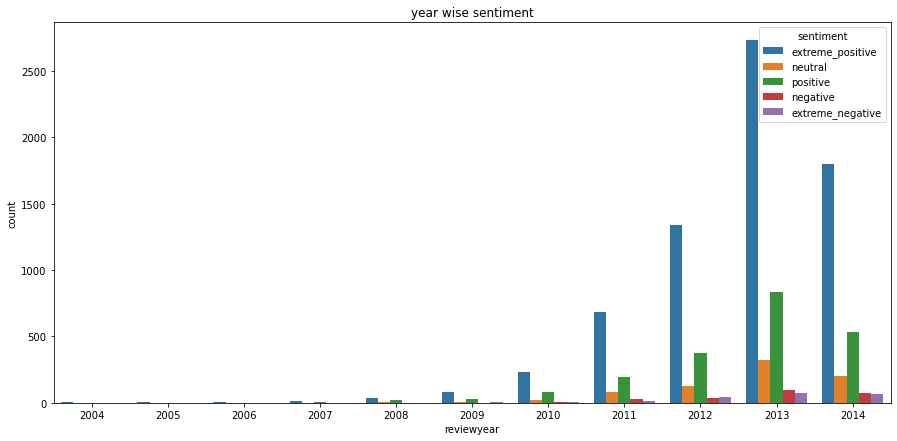

In [21]:
plt.figure(figsize=(15,7))
sb.countplot(df['reviewyear'],hue=df['sentiment'])
plt.title('year wise sentiment')
plt.show()

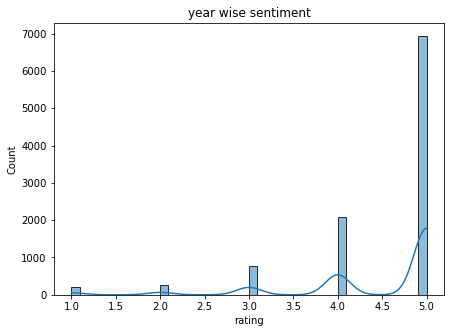

In [22]:
plt.figure(figsize=(7,5))
sb.histplot(df['rating'],kde=True)
plt.title('year wise sentiment')
plt.show()

In [23]:
df.to_csv("musical_instruments")

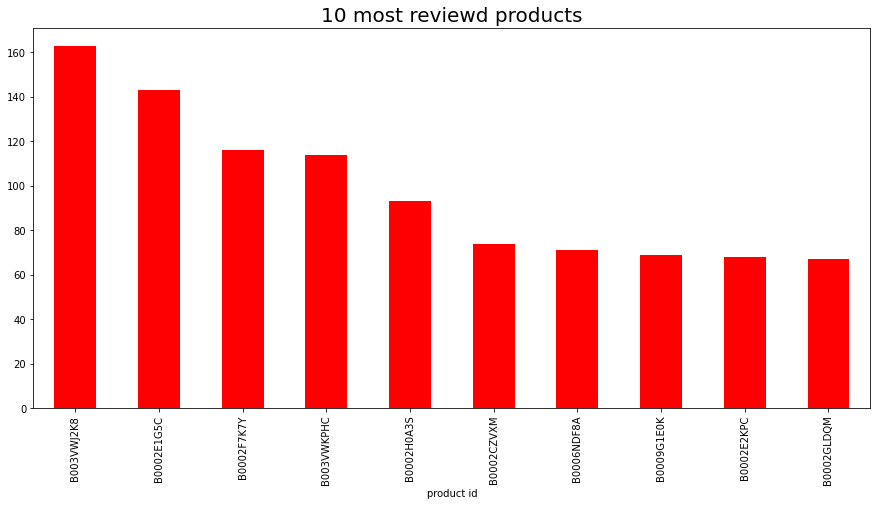

In [24]:
df['productID'].value_counts()[:10].plot.bar(figsize=(15,7),color='red')
plt.title("10 most reviewd products",fontsize=20)
plt.xlabel('product id')
plt.show()

<Figure size 1080x432 with 0 Axes>

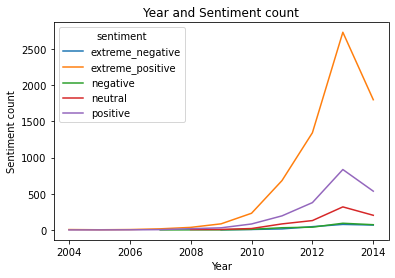

In [25]:
plt.figure(figsize=(15,6))
df.groupby(['reviewyear','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [26]:
import re

def clean_text(text):
    text=re.sub("[^0-9A-Za-z\-]+"," ",text)#remoce special characters
    text=re.sub("(?<!\w)\d+","",text)  #if number is written after a word remove it
    text=re.sub("-(?!\w)","",text)  #remove hyphen except for words which need hyphen tik-tok 
    text=" ".join(text.split())
    text=text.lower()
    return text

In [27]:
df['reviewText']=df['reviewText'].apply(clean_text)
df['reviewText'][2]

'the primary job of this device is to block the breath that would otherwise produce a popping sound while allowing your voice to pass through with no noticeable reduction of volume or high frequencies the double cloth filter blocks the pops and lets the voice through with no coloration the metal clamp mount attaches to the mike stand secure enough to keep it attached the goose neck needs a little coaxing to stay where you put it'

In [28]:
df['rating'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: rating, dtype: int64

In [29]:
df['sentiment'].value_counts()

extreme_positive    6938
positive            2084
neutral              772
negative             250
extreme_negative     217
Name: sentiment, dtype: int64

In [30]:
df['reviewyear'].value_counts()

2013    4055
2014    2679
2012    1936
2011    1007
2010     350
2009     128
2008      63
2007      22
2006      10
2004       7
2005       4
Name: reviewyear, dtype: int64

In [31]:
df.groupby(['reviewyear','sentiment']).size()

reviewyear  sentiment       
2004        extreme_positive       6
            positive               1
2005        extreme_positive       3
            positive               1
2006        extreme_negative       1
            extreme_positive       6
            neutral                1
            positive               2
2007        extreme_positive      16
            negative               1
            positive               5
2008        extreme_positive      36
            negative               2
            neutral                7
            positive              18
2009        extreme_negative       3
            extreme_positive      85
            negative               2
            neutral                8
            positive              30
2010        extreme_negative       7
            extreme_positive     231
            negative               9
            neutral               20
            positive              83
2011        extreme_negative      15
         

In [32]:
df['productID'].unique()

array(['1384719342', 'B00004Y2UT', 'B00005ML71', 'B000068NSX',
       'B000068NTU', 'B000068NVI', 'B000068NW5', 'B000068NZC',
       'B000068NZG', 'B000068O1N', 'B000068O3D', 'B000068O3X',
       'B000068O4H', 'B000068O59', 'B00006LVEU', 'B00009W40D',
       'B00009W40G', 'B0000AQRSR', 'B0000AQRSS', 'B0000AQRST',
       'B0000AQRSU', 'B000165DSM', 'B0001FTVD6', 'B0002BACB4',
       'B0002CZR3G', 'B0002CZSJO', 'B0002CZSJY', 'B0002CZST4',
       'B0002CZT0M', 'B0002CZTIO', 'B0002CZUTM', 'B0002CZUUG',
       'B0002CZV46', 'B0002CZV78', 'B0002CZV7I', 'B0002CZV82',
       'B0002CZVA0', 'B0002CZVB4', 'B0002CZVBE', 'B0002CZVHI',
       'B0002CZVI2', 'B0002CZVK0', 'B0002CZVW8', 'B0002CZVWS',
       'B0002CZVXM', 'B0002CZVZK', 'B0002CZW0Y', 'B0002CZZW4',
       'B0002D0096', 'B0002D01IG', 'B0002D01K4', 'B0002D01KO',
       'B0002D01PY', 'B0002D02IU', 'B0002D02RQ', 'B0002D05FU',
       'B0002D070I', 'B0002D0B4K', 'B0002D0C1C', 'B0002D0CA8',
       'B0002D0CAI', 'B0002D0CEO', 'B0002D0CGC', 'B0002

In [33]:
product_rating={}
for row,product in enumerate(df['productID'].unique()):
    product_temp=df[df["productID"]==product]
    product_rating[product]=product_temp['rating'].mean()

In [34]:
df_product_rating=pd.DataFrame(list(product_rating.items()),columns=['productId',"rating"])
df_product_rating.head()

,productId,rating
0,1384719342,5.000000
1,B00004Y2UT,4.666667
2,B00005ML71,3.800000
3,B000068NSX,4.571429
4,B000068NTU,4.800000


In [35]:
df_product_rating[df_product_rating['rating']==df_product_rating['rating'].min()]

,productId,rating
600,B0025V1REU,2.714286


#### 2.71(the sentiment is negative) is the minimum rating and productid is B0025V1REU

In [36]:
d=df[df['productID']=='B0025V1REU']
d

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,sentiment,reviewyear
7080,A3HCK3UXD6WS4G,B0025V1REU,"[0, 0]",this processor is okay for home practice if yo...,3.0,okay,2014-03-11,neutral,2014
7081,A2W8OGJDV7TCMT,B0025V1REU,"[0, 0]",this little unit is packed with great effects ...,4.0,Just keeps getting better...,2014-01-23,positive,2014
7082,A2T8TWZAWLQWBV,B0025V1REU,"[0, 1]",i like the drum machine and the tuner but i do...,3.0,It's OK,2014-02-26,neutral,2014
7083,A3KBFCPNQ58YK4,B0025V1REU,"[0, 1]",these types of pedals are toys they are a chea...,1.0,A Toy,2014-02-21,extreme_negative,2014
7084,AK7X7IXX7WYNJ,B0025V1REU,"[1, 1]",works well and has good sound i really enjoy a...,5.0,cool,2014-01-20,extreme_positive,2014
7085,AA8SWH4Y5SN8H,B0025V1REU,"[0, 1]",i had a friend with one of these and he loves ...,1.0,Oh god,2012-12-28,extreme_negative,2012
7086,A2IROAVGAK1G0S,B0025V1REU,"[1, 2]",this particular brand i ve seen around and hav...,2.0,Dead Digi,2012-11-20,negative,2012


In [37]:
d['reviewText'].iloc[3]

'these types of pedals are toys they are a cheap way for a beginner to have effects to play with by all means if you are buying it for your kid who just started playing if not i recommend slowly building your pedal collection and use the money to get decent pedal whether it is a delay or distortion'

In [38]:
d['reviewText'].iloc[5]

'i had a friend with one of these and he loves it i got one on his recommendation and when i put the batteries in it it started smoking it did work for awhile i pulled the batteries out and tried to ac adapter and it smoked again this time it did not work i am one of those people who gives an item one try and if it does not work holds a grudge i would not advise anybody to get this'

In [39]:
d['reviewText'].iloc[6]

'this particular brand i ve seen around and haven t heard to much about them but the one that i got worked fine for about a couple days it went out and i sent it in hoping to rule out the possibility that i might have gotten a bad one and i requested in a letter when i sent it in that they send another one in exchange that didn t work out so well with that being the only way i could rate it and never receiving a replacement to verify that i just got a bad one i d have to rate this one at the bottom'

###### yes,these are reyally dissapointed

In [40]:
df['reviewText'].iloc[:5]

0    not much to write about here but it does exact...
1    the product does exactly as it should and is q...
2    the primary job of this device is to block the...
3    nice windscreen protects my mxl mic and preven...
4    this pop filter is great it looks and performs...
Name: reviewText, dtype: object

In [41]:
len(df['reviewText'])

10261

In [42]:
! pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [43]:
from textblob import TextBlob

In [44]:
blob=TextBlob(df['reviewText'][1])
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.3277777777777778)

In [45]:
polarity_list,subjectivity_list=[],[]
for i in range(len(df['reviewText'])):
    blob=TextBlob(df['reviewText'][i])
    polarity_list.append(blob.sentiment.polarity)
    subjectivity_list.append(blob.sentiment.subjectivity)

In [46]:
print(polarity_list[:5])
print(subjectivity_list[:5])

[0.25, 0.0, 0.1675, 0.2, 0.8]
[0.3986111111111111, 0.3277777777777778, 0.4342857142857143, 0.925, 0.75]


In [47]:
#plt.figure(figsize=(10,6))
#plt.scatter(y='polarity_list', x='subjectivity_list', hue="target", data=df)
#plt.xlabel('Polarity', fontsize=13)
#plt.ylabel('Subjectivity', fontsize=13)
#plt.title('Polarity vs Subjectivity', fontsize=15)
#plt.show();

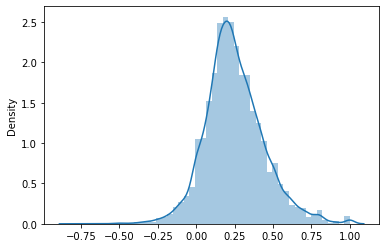

In [48]:
sb.distplot(polarity_list)
plt.show()

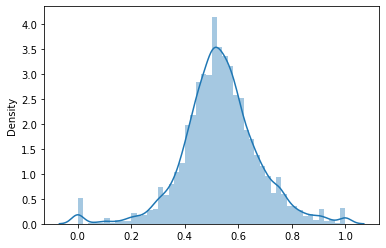

In [49]:
sb.distplot(subjectivity_list)
plt.show()

In [50]:
from scipy import stats
stats.describe(polarity_list)

DescribeResult(nobs=10261, minmax=(-0.8, 1.0), mean=0.25013073979243905, variance=0.03688743887107621, skewness=0.43058351427317926, kurtosis=1.2877301984680276)

In [51]:
stats.describe(subjectivity_list)

DescribeResult(nobs=10261, minmax=(0.0, 1.0), mean=0.53279657869794, variance=0.020878624890016226, skewness=-0.16536582116884657, kurtosis=2.0268253360738324)

##### highly positive reviews

In [52]:
c=0
for i in range(len(polarity_list)):
    if(c>10):break
    if(polarity_list[i]>.9 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

works for practice it s a guitar instrument cable what can i say maybe not the best but it serves it s purpose 

i use this for video exchanges on a guitar instruction website it s perfect for vocals podcasting video recording and so forth shure makes excellent stuff what s also great is you save some money as an xlr cable is included i m very happy with this purchase 

the grip is excellent but i prefer the sharps over these these are sturdy and look like i won t be needing another set for quite some time 

a very good strap 

best tool ever 

perfect perfect size weight shape i like the medium playing electric because it gives you the best of both worlds recommended 

excellent 

does what it should and yamaha quality the price seems very good for what you get out of this pedal i am using on a yamaha board 

they are some of the best drum sticks i ve played they lasted me about two weeks before i had to move on to another before 

for a microphone at amazon may not be the best mic ou

##### highly negative reviws

In [53]:
c=0
for i in range(len(polarity_list)):
    if(c>10):break
    if(polarity_list[i]<.9 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

not much to write about here but it does exactly what it s supposed to filters out the pop sounds now my recordings are much more crisp it is one of the lowest prices pop filters on amazon so might as well buy it they honestly work the same despite their pricing 

the product does exactly as it should and is quite affordable i did not realized it was double screened until it arrived so it was even better than i had expected as an added bonus one of the screens carries a small hint of the smell of an old grape candy i used to buy so for reminiscent s sake i cannot stop putting the pop filter next to my nose and smelling it after recording dif you needed a pop filter this will work just as well as the expensive ones and it may even come with a pleasing aroma like mine did buy this product 

the primary job of this device is to block the breath that would otherwise produce a popping sound while allowing your voice to pass through with no noticeable reduction of volume or high frequencies 

##### objective revies

In [54]:
c=0
for i in range(len(subjectivity_list)):
    if(c>10):break
    if(subjectivity_list[i]>.9 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

nice windscreen protects my mxl mic and prevents pops only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging 

i got of these to plug xlr cables into the jacks on my board i got it because my board only has channels with xlr inputs none of them work perhaps i got the wrong thing 

there s nothing complicated about this purchase it s a cable it works it doesn t cost a lot it s a great deal get it i use it every week and it still sounds perfect then again i never mistreat my equipment 

i use this for video exchanges on a guitar instruction website it s perfect for vocals podcasting video recording and so forth shure makes excellent stuff what s also great is you save some money as an xlr cable is included i m very happy with this purchase 

hello i bought a epiphone goth studio guitar and i also bought this beauty i m very satisfied with the quality of this case as it makes my guitar looks ve

##### subjective reviews

In [55]:
c=0
for i in range(len(subjectivity_list)):
    if(c>10):break
    if(subjectivity_list[i]<.1 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

i bought this to use in my home studio to control my midi keyboard it does just what i wanted it to do 

for the price can t beat it works as well as any one i would have bought at local guitar stores 

i was getting errors that my printer cartridge wasn t recognized and i sprayed some on the contacts and wiped off the excess with a paper towel now it s working 

use this alot on all kinds of electronics it gets crackling knobs going again i ve use it for years recommend 

received it in time standard blister packaging but the cable stopped working after days since i was out of days return time sent an email to the manufacturer but no response till today 

they are screws they screw in and hold things to say that they did less would ve gotten the star i like them 

after buying this product i have concluded that is a lot of money for foam does the job but i think the velcro job would be preferable to this one 

wanted a way to plug in my boss me70 to save on batteries didn t want to dr

##### neutral reviews

In [56]:
c=0
for i in range(len(polarity_list)):
    if(c>10):break
    if(polarity_list[i]==0 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

the product does exactly as it should and is quite affordable i did not realized it was double screened until it arrived so it was even better than i had expected as an added bonus one of the screens carries a small hint of the smell of an old grape candy i used to buy so for reminiscent s sake i cannot stop putting the pop filter next to my nose and smelling it after recording dif you needed a pop filter this will work just as well as the expensive ones and it may even come with a pleasing aroma like mine did buy this product 

i bought this to use in my home studio to control my midi keyboard it does just what i wanted it to do 

for the price can t beat it works as well as any one i would have bought at local guitar stores 

just a basic female xlr to inch male adapter i use these so i can plug my regular mic cables into my keyboard practice all in one pa 

i was getting errors that my printer cartridge wasn t recognized and i sprayed some on the contacts and wiped off the excess wi

In [57]:
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
#! pip install wordcloud

In [59]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

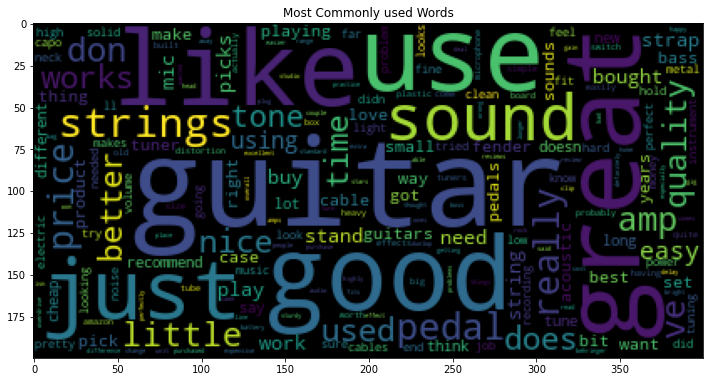

In [60]:
cnv = CountVectorizer(stop_words = 'english')
wrds = cnv.fit_transform(df["reviewText"])
sum_wrds = wrds.sum(axis = 0)

wrds_freq = [(wrd, sum_wrds[0, idx]) for wrd, idx in cnv.vocabulary_.items()]
wrds_freq = sorted(wrds_freq, key = lambda x : x[1], reverse = True)
freq = pd.DataFrame(wrds_freq, columns = ['word', 'frequency'])

wrdcloud = WordCloud().generate_from_frequencies(dict(wrds_freq))

plt.figure(figsize = (12,8))
plt.title("Most Commonly used Words")
plt.imshow(wrdcloud)
plt.show()

In [61]:
# separating all records into a differnet variable to generate wordcloud based on category
neu = df[df["sentiment"] == "neutral"]["reviewText"]
neg = df[df["sentiment"] == "negative"]["reviewText"]
pos = df[df["sentiment"] == "positive"]["reviewText"]
exneg = df[df["sentiment"] == "extreme_negative"]["reviewText"]
expos = df[df["sentiment"] == "extreme_positive"]["reviewText"]

In [62]:
stpwrds = set(STOPWORDS)
def word_cloud(data, title):
    wordcld = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stpwrds,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.25)
    plt.imshow(wordcld)
plt.show()

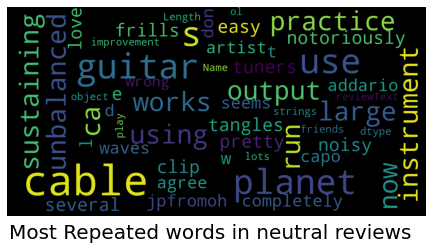

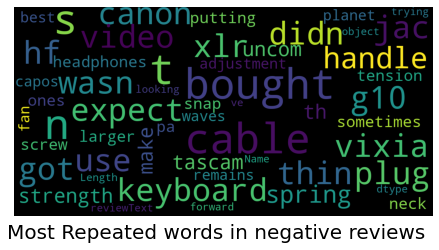

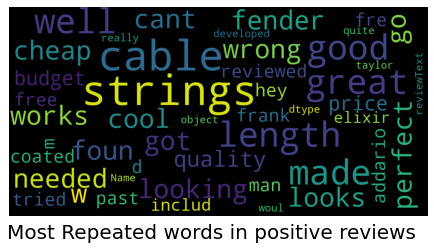

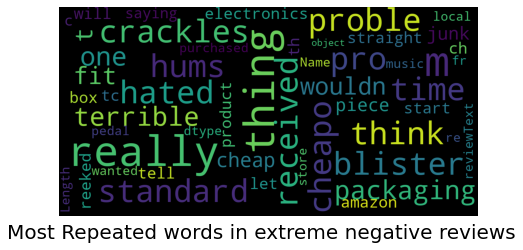

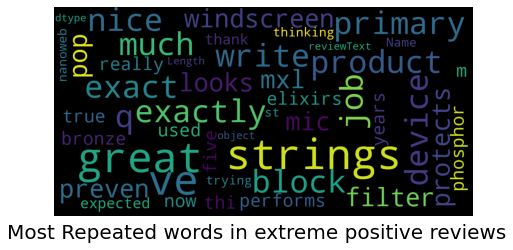

In [63]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(exneg, "Most Repeated words in extreme negative reviews")
word_cloud(expos, "Most Repeated words in extreme positive reviews")

In [64]:
df["target"] = df["sentiment"]
df["target"] = df["target"].replace({"extreme_negative":"0","negative":"0","neutral":"0","positive":"1","extreme_positive":"1"})
df.head(2)

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,sentiment,reviewyear,target
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",not much to write about here but it does exact...,5.0,good,2014-02-28,extreme_positive,2014,1
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",the product does exactly as it should and is q...,5.0,Jake,2013-03-16,extreme_positive,2013,1


In [65]:
x_train,x_test,y_train,y_test=train_test_split(df['reviewText'],df['target'],test_size=0.20,random_state=42)

In [66]:
vectorizer=TfidfVectorizer(
    sublinear_tf=True,
    max_df=0.5,
    min_df=1,
    stop_words=stopwords.words("english"),
    use_idf=True
)

In [67]:
x_train=vectorizer.fit_transform(x_train)
print('x_train n_samples:%d,n_features:%d' %x_train.shape)

x_train n_samples:8208,n_features:17531


In [68]:
x_test=vectorizer.transform(x_test)
print('x_test n_samples:%d,n_features:%d' %x_test.shape)

x_test n_samples:2053,n_features:17531


In [69]:
cv=TfidfVectorizer(max_features=2500)
x=cv.fit_transform(df['reviewText'])

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [71]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [72]:
print(pred[:10])
print(y_test[:10])

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
2507    1
5159    1
932     0
1190    1
2619    1
251     1
2487    1
9920    1
7835    1
7260    0
Name: target, dtype: object


In [73]:
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred,average='weighted')
f1=f1_score(y_test,pred,average='weighted')
recall=recall_score(y_test,pred,average='weighted')
print("accuracy=",accuracy)
print('precision=',precision)
print('f1=',f1)
print('recall=',recall)

accuracy= 0.8860204578665368
precision= 0.8895040053636609
f1= 0.8378076666392545
recall= 0.8860204578665368


In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [75]:
nb=MultinomialNB().fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [76]:
y_pred[:10]

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype='<U1')

In [77]:
y_test[:10]

2507    1
5159    1
932     0
1190    1
2619    1
251     1
2487    1
9920    1
7835    1
7260    0
Name: target, dtype: object

In [78]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [79]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
print("accuracy=",accuracy)
print('precision=',precision)
print('f1=',f1)
print('recall=',recall)

accuracy= 0.8811495372625426
precision= 0.7764245070179929
f1= 0.8254787741625788
recall= 0.8811495372625426


In [80]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier().fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [81]:
y_pred1

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [82]:
y_test

2507    1
5159    1
932     0
1190    1
2619    1
       ..
400     1
2956    1
3614    1
3501    1
6671    1
Name: target, Length: 2053, dtype: object

In [83]:
accuracy=accuracy_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1,average='weighted')
f1=f1_score(y_test,y_pred1,average='weighted')
recall=recall_score(y_test,y_pred1,average='weighted')
print("accuracy=",accuracy)
print('precision=',precision)
print('f1=',f1)
print('recall=',recall)

accuracy= 0.8830979055041402
precision= 0.8677379516171099
f1= 0.8319372904390436
recall= 0.8830979055041402


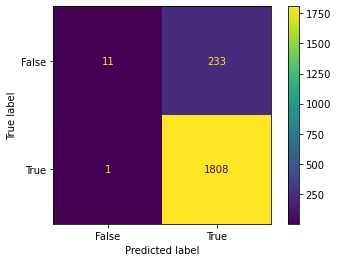

In [84]:
cm=confusion_matrix(y_test,pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

###### clustering

In [85]:
from sklearn.cluster import KMeans

In [86]:
df33=pd.DataFrame(polarity_list)

In [87]:
df33['overall']=df['rating']

In [88]:
df33

,0,overall
0,0.250000,5.0
1,0.000000,5.0
2,0.167500,5.0
3,0.200000,5.0
4,0.800000,5.0
...,...,...
10256,0.350000,5.0
10257,0.184228,5.0
10258,0.197768,4.0
10259,0.153843,4.0


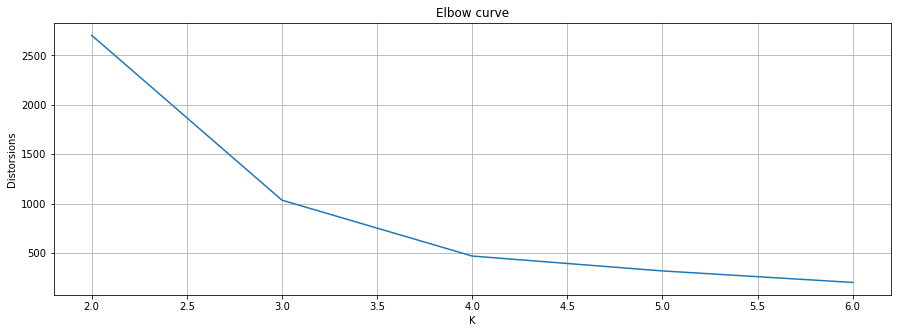

In [89]:
distorsions = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df33)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 7), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.7427342571650726
For n_clusters = 3 The average silhouette_score is : 0.7567279719108141
For n_clusters = 4 The average silhouette_score is : 0.7932893035345815
For n_clusters = 5 The average silhouette_score is : 0.6256637439492809
For n_clusters = 6 The average silhouette_score is : 0.6376396241409876
For n_clusters = 7 The average silhouette_score is : 0.6116324174467791


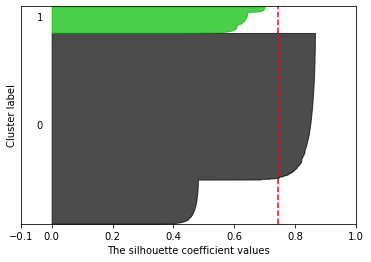

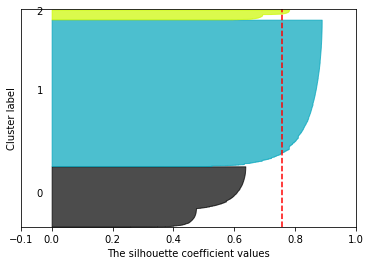

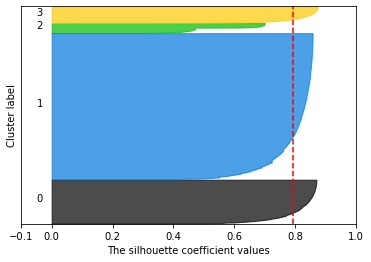

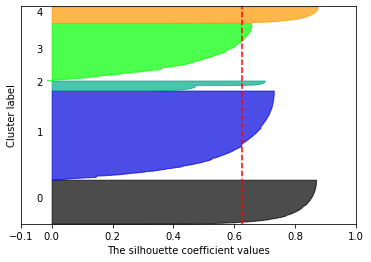

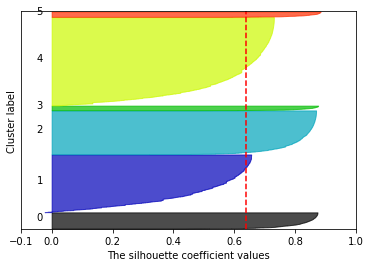

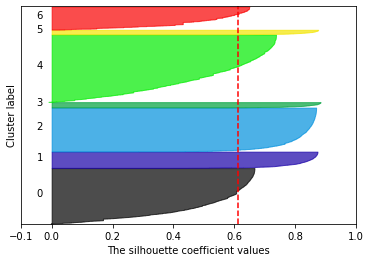

In [90]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df33)

    silhouette_avg = silhouette_score(df33, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df33, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [91]:
Kmeans_model = KMeans(n_clusters=4)
Kmeans_model.fit(df33)

KMeans(n_clusters=4)

In [92]:
cluster_centroid = Kmeans_model.cluster_centers_
cluster_centroid

array([[0.27929287, 5.        ],
       [0.08593693, 1.53533191],
       [0.22287606, 4.        ],
       [0.16094733, 3.        ]])

In [93]:
labels = Kmeans_model.labels_
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0])

In [94]:
pred=Kmeans_model.fit_predict(df33)
pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0])

In [95]:
x=df33.iloc[:,[0,1]].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


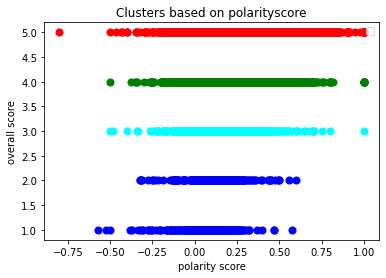

In [96]:
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 50, c = 'red')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 50, c = 'blue')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 50, c = 'green')
plt.scatter(x[pred == 3, 0], x[pred == 3, 1], s = 50, c = 'cyan')
plt.title('Clusters based on polarityscore')
plt.xlabel('polarity score')
plt.ylabel('overall score')
plt.legend()
plt.show()

###### time series analysis

In [97]:
df2=pd.DataFrame(df['rating'])
df2

,rating
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
10256,5.0
10257,5.0
10258,4.0
10259,4.0


In [98]:
df2['reviewTime']=df['reviewTime']
df2

,rating,reviewTime
0,5.0,2014-02-28
1,5.0,2013-03-16
2,5.0,2013-08-28
3,5.0,2014-02-14
4,5.0,2014-02-21
...,...,...
10256,5.0,2014-07-20
10257,5.0,2014-07-02
10258,4.0,2014-07-22
10259,4.0,2014-07-01


In [99]:
df2=df2.groupby('reviewTime').sum()
df2

,rating
reviewTime,
2004-09-18,4.0
2004-09-29,10.0
2004-11-29,15.0
2004-12-01,5.0
2005-01-28,5.0
...,...
2014-07-16,9.0
2014-07-19,10.0
2014-07-20,45.0


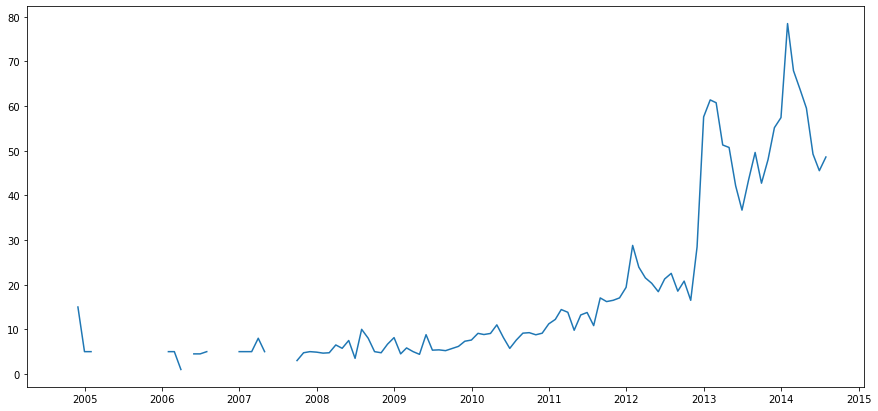

In [100]:
mon_resample=df2.resample('M')
new_df=pd.DataFrame(mon_resample.mean())
plt.figure(figsize=(15,7))

plt.plot(new_df)

In [101]:
len(new_df)

119

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [103]:
#decomp=seasonal_decompose(new_df,period=12)
decomp=seasonal_decompose(df2,period=12)

In [104]:
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

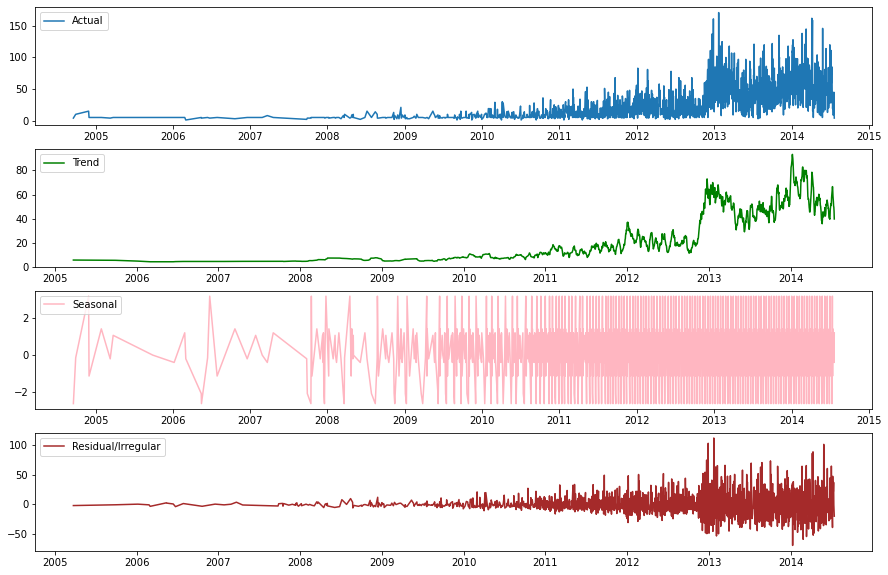

In [105]:
fig, ax = plt.subplots(4, 1, figsize = (15, 10)) # if we are not interested in naming variable of return value, then write _ # like x,y = plt(1,2) then if we dont care of return of 1, write _,y = plt(1,2)

# Actual Data
plt.subplot(411)
plt.plot(df2, label = 'Actual')
plt.legend()

# Trend
plt.subplot(412)
plt.plot(trend, label = 'Trend', color = 'green')
plt.legend()

# Seasonal
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal', color = 'lightpink')
plt.legend()

# Residual/Irregular
plt.subplot(414)
plt.plot(residual, label = 'Residual/Irregular', color = 'brown')
plt.legend();

In [106]:
from statsmodels.tsa.api import ExponentialSmoothing
alpha=0.2;beta=0.5;gamma=0.8

In [107]:
model_tep=ExponentialSmoothing(df2,trend='add',seasonal='add',seasonal_periods=365).fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [108]:
fcast_tep=model_tep.fittedvalues
fcast_tep

reviewTime
2004-09-18     3.973615
2004-09-29     7.837471
2004-11-29    15.317345
2004-12-01     6.746779
2005-01-28     8.648186
                ...    
2014-07-16    46.701661
2014-07-19    36.774657
2014-07-20    34.711559
2014-07-21    29.579495
2014-07-22   -18.566995
Length: 1570, dtype: float64

Text(0.5, 1.0, 'triple Exponent Smoothing')

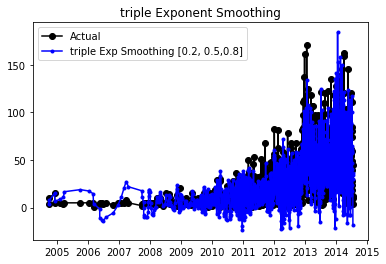

In [109]:
plt.plot(df2,marker='o',color='black',label='Actual')
plt.plot(fcast_tep, marker='.',color='blue',label='triple Exp Smoothing [0.2, 0.5,0.8]')
plt.legend()
plt.title('triple Exponent Smoothing')

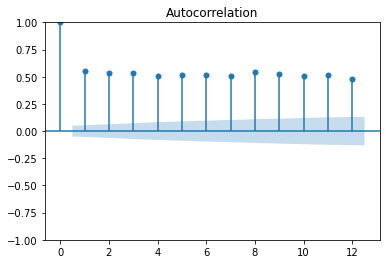

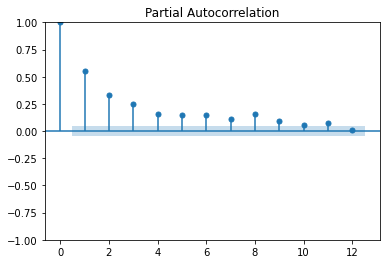

In [110]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df2,lags=12)
plot_pacf(df2,lags=12)
plt.show()

In [111]:
p=9;q=12;d=1

In [112]:
train_len=int(0.7*len(df2))
train=df2.iloc[:train_len]
test=df2.iloc[train_len:]

In [113]:
print(len(train))
print(len(test))

1099
471


In [114]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(train,order=(p,1,q)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 rating   No. Observations:                 1099
Model:                ARIMA(9, 1, 12)   Log Likelihood               -4527.336
Date:                Thu, 08 Dec 2022   AIC                           9098.672
Time:                        21:23:14   BIC                           9208.700
Sample:                             0   HQIC                          9140.300
                               - 1099                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0639      0.378      0.169      0.866      -0.678       0.805
ar.L2         -0.2901      0.337     -0.860      0.390      -0.951       0.371
ar.L3         -0.5195      0.384     -1.353      0.176      -1.272       0.233
ar.L4         -0.2067      0.298     -0.694      0.488      -0.791       0.377
ar.L5          0.0300      0.356      0.084      0.933      -0.669       0.729
ar.L6         -0.3609      0.325     -1.111      0.267      -0.998       0.276
ar.L7         -0.2043      0.347     -0.589      0.556      -0.884       0.476
ar.L8          0.4891      0.265      1.842      0.065      -0.031       1.009
ar.L9         -0.5091      0.264     -1.928      0.054      -1.027       0.009
ma.L1         -1.0051      1.570     -0.640      0.522      -4.082       2.072
ma.L2          0.3283      1.916      0.171      0.864      -3.427       4.084
ma.L3          0.2188      0.612      0.358      0.721      -0.981       1.418
ma.L4         -0.2913      3.322     -0.088      0.930      -6.802       6.219
ma.L5         -0.2194      4.705     -0.047      0.963      -9.440       9.002
ma.L6          0.3994      2.875      0.139      0.890      -5.236       6.035
ma.L7         -0.0880      0.762     -0.116      0.908      -1.581       1.405
ma.L8         -0.6273      3.094     -0.203      0.839      -6.692       5.437
ma.L9          1.0023      2.905      0.345      0.730      -4.692       6.697
ma.L10        -0.5153      1.068     -0.483      0.629      -2.608       1.577
ma.L11        -0.0157      0.071     -0.220      0.826      -0.155       0.124
ma.L12         0.0148      0.059      0.252      0.801      -0.100       0.130
sigma2       232.0143    466.570      0.497      0.619    -682.446    1146.474
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2048.68
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              17.84   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
p=np.arange(9)
q=np.arange(12)
li=[]
for p in range(10):
    for q in range(13):
        li.append((p,1,q))

In [117]:
model=[]

for i in li:
    m=ARIMA(train,order=i).fit()
    model.append(m)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
aic=[]
bic=[]
mse=[]
rmse=[]
for i in model:
    aic.append(i.aic)
    bic.append(i.bic)
    a=mean_squared_error(train,i.fittedvalues)
    b=mean_squared_error(train,i.fittedvalues,squared=False)
    mse.append(a)
    rmse.append(b)

In [121]:
print(min(aic))
print(min(bic))
print(min(mse))
print(min(rmse))

9074.190209756762
9118.118821431382
219.17492727855438
14.804557652241906


In [122]:
print(rmse.index(min(rmse)))

116


In [123]:
print(li[116])

(8, 1, 12)


In [124]:
p=8;q=12

In [125]:
model_arma=ARIMA(train,order=(p,1,q)).fit()

In [126]:
fcast_arma=model_arma.fittedvalues
fcast_arma

reviewTime
2004-09-18     0.000000
2004-09-29     3.999195
2004-11-29     7.218291
2004-12-01    10.166902
2005-01-28     8.100833
                ...    
2013-04-01    56.154189
2013-04-02    66.277867
2013-04-03    58.295235
2013-04-04    57.639561
2013-04-05    51.332180
Length: 1099, dtype: float64

In [127]:
model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 rating   No. Observations:                 1099
Model:                ARIMA(8, 1, 12)   Log Likelihood               -4519.762
Date:                Thu, 08 Dec 2022   AIC                           9081.523
Time:                        21:27:46   BIC                           9186.549
Sample:                             0   HQIC                          9121.259
                               - 1099                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8841      2.042     -0.433      0.665      -4.887       3.119
ar.L2         -0.9777      2.723     -0.359      0.720      -6.316       4.360
ar.L3         -1.0716      3.051     -0.351      0.725      -7.052       4.908
ar.L4         -0.9867      3.457     -0.285      0.775      -7.762       5.788
ar.L5         -0.5164      3.346     -0.154      0.877      -7.075       6.042
ar.L6         -0.5799      2.445     -0.237      0.813      -5.372       4.212
ar.L7         -0.2986      2.084     -0.143      0.886      -4.384       3.786
ar.L8          0.2658      1.508      0.176      0.860      -2.690       3.222
ma.L1         -0.0371      2.044     -0.018      0.986      -4.043       3.969
ma.L2          0.1091      0.976      0.112      0.911      -1.805       2.023
ma.L3          0.1025      0.558      0.184      0.854      -0.991       1.196
ma.L4         -0.0501      0.569     -0.088      0.930      -1.166       1.065
ma.L5         -0.4717      0.245     -1.924      0.054      -0.952       0.009
ma.L6          0.0902      0.949      0.095      0.924      -1.770       1.951
ma.L7         -0.1808      0.499     -0.362      0.717      -1.159       0.797
ma.L8         -0.4854      0.519     -0.936      0.350      -1.502       0.532
ma.L9          0.3735      1.246      0.300      0.764      -2.069       2.816
ma.L10         0.0890      0.323      0.275      0.783      -0.544       0.722
ma.L11        -0.0310      0.322     -0.096      0.923      -0.663       0.601
ma.L12         0.0032      0.066      0.048      0.962      -0.125       0.132
sigma2       223.4237      6.065     36.838      0.000     211.536     235.311
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1785.40
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              17.48   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
predictions=model_arma.predict(start=len(train),end=len(train)+len(test)-1)

In [129]:
predictions

1099    50.135048
1100    54.733092
1101    46.986120
1102    55.419420
1103    62.199464
          ...    
1565    54.756361
1566    54.760865
1567    54.756020
1568    54.759018
1569    54.759163
Name: predicted_mean, Length: 471, dtype: float64

In [130]:
fcast=model_arma.predict(start=len(df2),end=len(df2)+10)
print(fcast)

1570    54.756028
1571    54.760660
1572    54.756655
1573    54.758249
1574    54.759716
1575    54.755933
1576    54.760266
1577    54.757346
1578    54.757580
1579    54.760063
1580    54.756055
Name: predicted_mean, dtype: float64


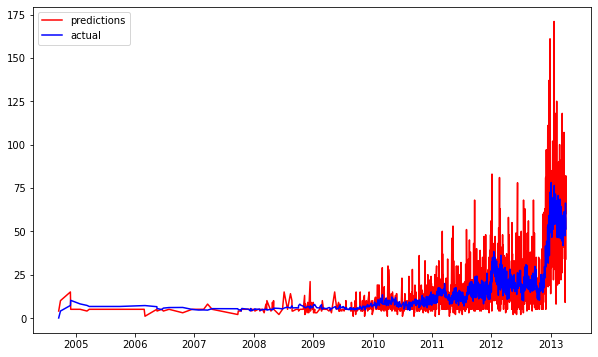

In [131]:
plt.figure(figsize=(10,6))
plt.plot(train,'r',label='predictions')
plt.plot(fcast_arma,'b',label='actual')
plt.legend()

#### SARIMA

In [132]:
p=1;q=1;d=2
import statsmodels.api as sm
model_sarima=sm.tsa.statespace.SARIMAX(new_df,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()

In [133]:
fcast_sarima=model_sarima.fittedvalues
fcast_sarima

reviewTime
2004-09-30     0.000000
2004-10-31    12.249789
2004-11-30    17.499656
2004-12-31    18.807777
2005-01-31    -4.998951
                ...    
2014-03-31    62.569127
2014-04-30    62.619951
2014-05-31    52.911642
2014-06-30    49.313177
2014-07-31    51.135563
Freq: M, Length: 119, dtype: float64

In [134]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             rating   No. Observations:                  119
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -343.800
Date:                            Thu, 08 Dec 2022   AIC                            697.600
Time:                                    21:35:28   BIC                            710.263
Sample:                                09-30-2004   HQIC                           702.712
                                     - 07-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2183      0.150     -1.450      0.147      -0.513       0.077
ma.L1         -0.9979      1.935     -0.516      0.606      -4.790       2.794
ar.S.L12      -0.6382      0.204     -3.127      0.002      -1.038      -0.238
ma.S.L12      -0.7950      0.355     -2.237      0.025      -1.492      -0.098
sigma2        29.4726     56.723      0.520      0.603     -81.702     140.647
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               356.76
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              20.27   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
fcast_sarima1 = model_sarima.forecast(len(test))

In [136]:
fcast_sarima1

2014-08-31      49.686235
2014-09-30      47.620320
2014-10-31      47.066798
2014-11-30      59.343965
2014-12-31      82.763718
                 ...     
2053-06-30    1769.119528
2053-07-31    1802.847601
2053-08-31    1832.121093
2053-09-30    1805.351377
2053-10-31    1813.208545
Freq: M, Name: predicted_mean, Length: 471, dtype: float64

In [138]:
fcast_sarima1[:80]

2014-08-31     49.686235
2014-09-30     47.620320
2014-10-31     47.066798
2014-11-30     59.343965
2014-12-31     82.763718
                 ...    
2020-11-30    179.166870
2020-12-31    210.520961
2021-01-31    244.386898
2021-02-28    228.135920
2021-03-31    215.060889
Freq: M, Name: predicted_mean, Length: 80, dtype: float64

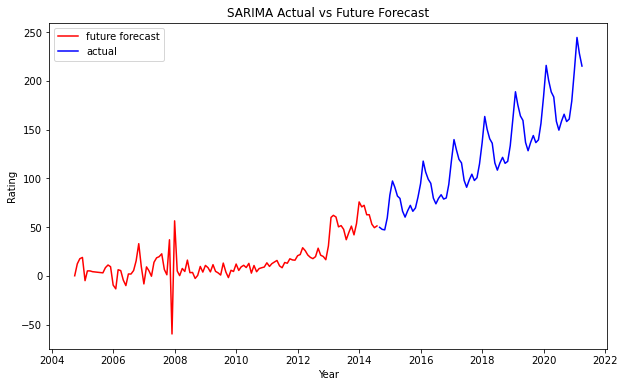

In [139]:
plt.figure(figsize=(10,6))
plt.plot(fcast_sarima,'red',label='future forecast')
plt.plot(fcast_sarima1[:80],'blue',label='actual')
plt.title("SARIMA Actual vs Future Forecast")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.legend()

In [140]:
aic=[]
bic=[]
mse=[]
rmse=[]
for i in model:
    aic.append(i.aic)
    bic.append(i.bic)
    a=mean_squared_error(train,i.fittedvalues)
    b=mean_squared_error(train,i.fittedvalues,squared=False)
    mse.append(a)
    rmse.append(b)

In [141]:
print(min(aic))
print(min(bic))
print(min(mse))
print(min(rmse))

9074.190209756762
9118.118821431382
219.17492727855438
14.804557652241906
